# Ingest the data

In [105]:
import pandas as pd

In [106]:
data = pd.read_csv(r'C:\iNeuron\End_to_end_Project_setup\notebooks\data\cubic_zirconia.csv')

In [107]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [108]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [109]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [110]:
data = data.dropna(axis=1)

In [111]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   table       26967 non-null  float64
 6   x           26967 non-null  float64
 7   y           26967 non-null  float64
 8   z           26967 non-null  float64
 9   price       26967 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 2.1+ MB


In [113]:
data = data.drop(labels = ['Unnamed: 0'], axis = 1)

In [114]:
data.duplicated().sum()

38

In [115]:
data.shape

(26967, 9)

In [116]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [117]:
cat_col = data.columns[data.dtypes == 'object']

In [118]:
num_col = data.columns[data.dtypes != 'object']

In [119]:
data[cat_col]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [120]:
data[num_col]

,carat,table,x,y,z,price
0,0.30,58.0,4.27,4.29,2.66,499
1,0.33,58.0,4.42,4.46,2.70,984
2,0.90,60.0,6.04,6.12,3.78,6289
3,0.42,56.0,4.82,4.80,2.96,1082
4,0.31,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...
26962,1.11,58.0,6.61,6.52,4.09,5408
26963,0.33,55.0,4.44,4.42,2.74,1114
26964,0.51,58.0,5.12,5.15,3.17,1656
26965,0.27,56.0,4.19,4.20,2.60,682


In [121]:
data[cat_col].describe()

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [122]:
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [123]:
data[cat_col]['cut'].value_counts()

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

In [124]:
data[cat_col]['color'].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [125]:
data[cat_col]['clarity'].value_counts()

clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

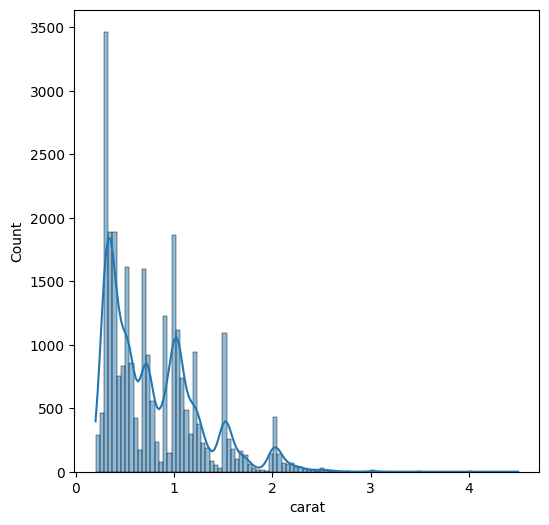

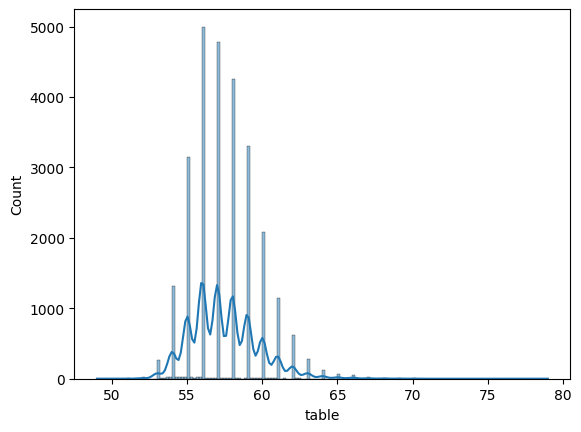

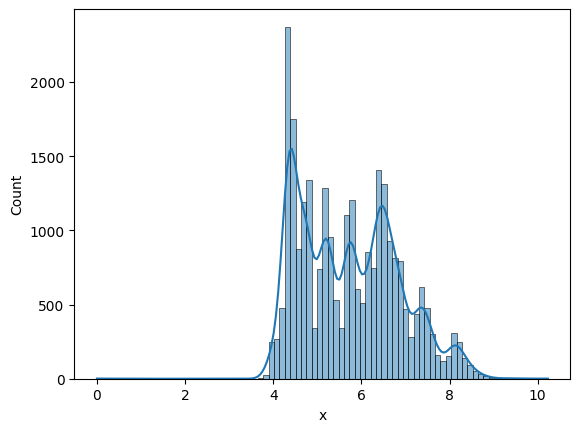

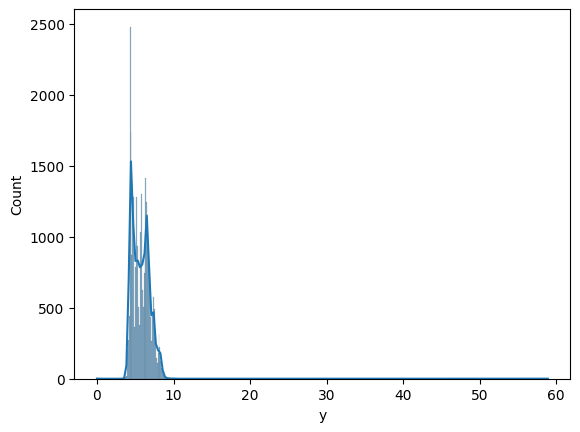

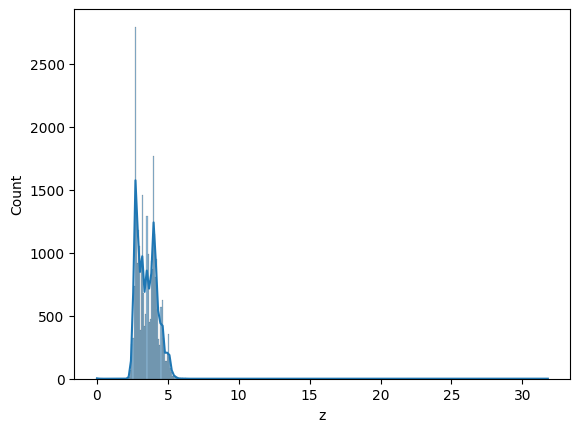

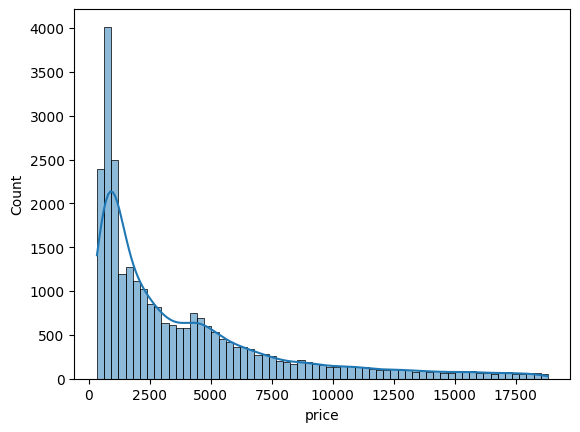

In [127]:
plt.figure(figsize = (6,6))
for col in num_col :
    sns.histplot(data = data, x = col, kde = True)
    print('\n')
    plt.show()

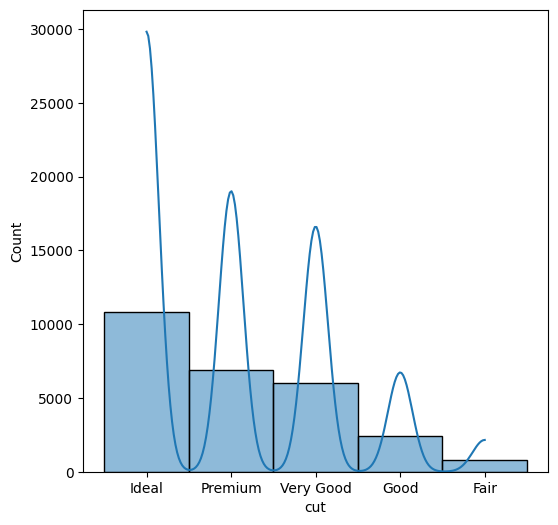

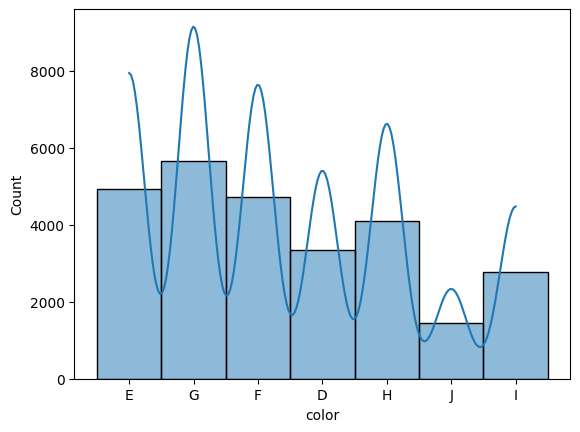

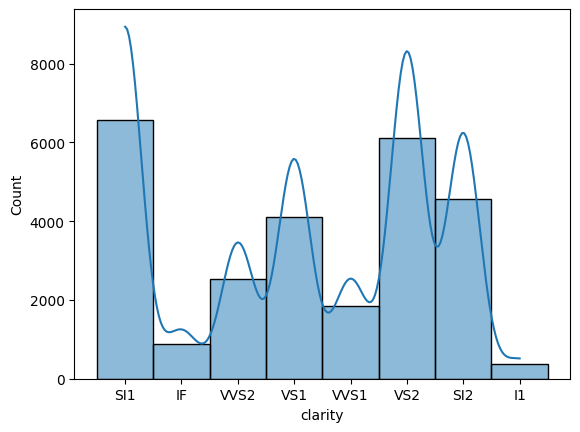

In [128]:
plt.figure(figsize = (6,6))
for col in cat_col :
    sns.histplot(data = data, x = col, kde = True)
    print('\n')
    plt.show()

<Axes: >

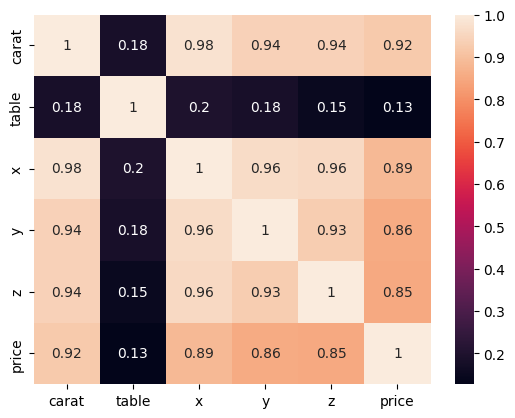

In [129]:
sns.heatmap(data[num_col].corr(), annot = True)

In [130]:
data['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [131]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [132]:
data['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [133]:
clarity_map = {'SI1' : 3, 'IF' : 8, 'VVS2' : 6, 'VS1' : 5, 'VVS1' : 7, 'VS2' : 4, 'SI2' : 2, 'I1' : 1}

In [134]:
cut_map = {'Ideal' : 5, 'Premium' : 4, 'Very Good' : 3, 'Good' : 2, 'Fair' : 1}

In [135]:
color_map = {'E' : 2, 'G' : 4, 'F' : 3, 'D' : 1, 'H' : 5, 'J' : 7, 'I' : 6}

In [136]:
data['cut'] = data['cut'].map(cut_map)

In [137]:
data['clarity'] = data['clarity'].map(clarity_map)

In [138]:
data['color'] = data['color'].map(color_map)

In [139]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price
0,0.30,5,2,3,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,59.0,4.35,4.43,2.65,779
